In [9]:
import os
import numpy as np
import pandas as pd
import datetime as dt
import yfinance as yf

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import AutoMinorLocator

from utils.portfolio import Portfolio
import utils.plotting as myplt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# set up plotting parameters
plot_greys   = myplt.set_colour_cycle(mpl, 'grey')
plot_colours = myplt.set_colour_cycle(mpl, 'colour')

base_directory   = os.getcwd()
output_directory = os.path.join(base_directory, 'output')

In [3]:
start_date = dt.datetime(2021,7,9) # y, m, d
end_date   = dt.datetime(2025,1,31) # y, m, d

transaction_file = 'transaction-files/test-history.csv'

In [ ]:
example_portfolio = Portfolio(transaction_file, start_date, end_date)

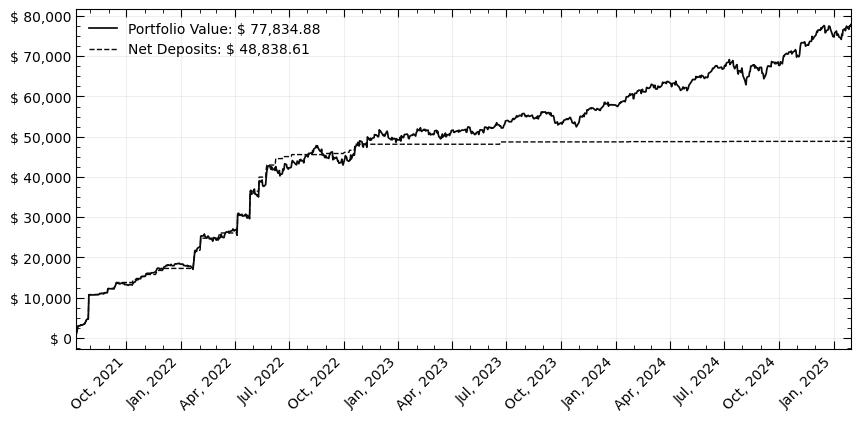

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))


# plot total value
ax.plot(example_portfolio.portfolio_data['value'], color=plot_greys[0], linestyle='-', linewidth=1.25,
        label=f'Portfolio Value: $ {example_portfolio.portfolio_data["value"].iloc[-1]:,.2f}')

# plot cumulative deposits
cumulative_deposits = example_portfolio.portfolio_data['deposits'].cumsum()
ax.plot(cumulative_deposits, color=plot_greys[0], linestyle='--', linewidth=1,
        label=f'Net Deposits: $ {cumulative_deposits.iloc[-1]:,.2f}')


# format plot
myplt.set_axis_ticks(ax)

ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=[1, 4, 7, 10]))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b, %Y'))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
fig.autofmt_xdate()
plt.xticks(rotation = 45)

ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_formatter('$ {x:1,.0f}')

plt.xlim([start_date, end_date])

plt.tick_params(axis='both',labelsize=10)

plt.grid(which='major', alpha=0.2)
legend = plt.legend(fontsize=10, loc='upper left', frameon=False)

plt.savefig(os.path.join(output_directory, 'portfolio-value.png'), dpi=300, format='png', bbox_inches='tight')
plt.show()

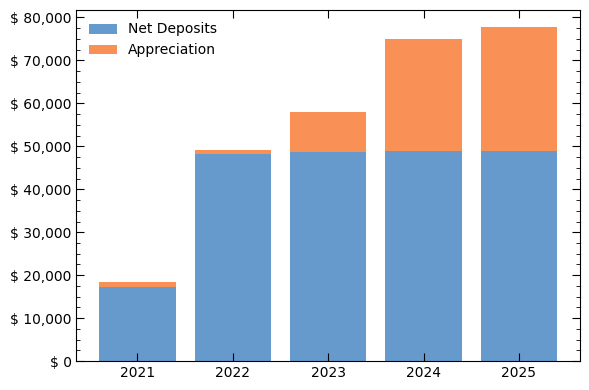

In [ ]:
# calculate cumulative annual portfolio value and deposit
cumulative_deposits = example_portfolio.portfolio_data['deposits'].cumsum()
annual_deposit      = cumulative_deposits.groupby(cumulative_deposits.index.year).last()
annual_gains        = example_portfolio.portfolio_data['value'].groupby(example_portfolio.portfolio_data.index.year).last() - annual_deposit

fig, ax = plt.subplots(figsize = (6, 4))

ax.bar(annual_deposit.index, annual_deposit.values, label='Net Deposits')
ax.bar(annual_gains.index, annual_gains.values, label='Appreciation', bottom=annual_deposit)


# format plot
myplt.set_axis_ticks(ax)

ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_formatter('$ {x:1,.0f}')

plt.tick_params(axis='both',labelsize=10)

legend = plt.legend(fontsize=10, loc='upper left', frameon=False)
fig.tight_layout()

plt.savefig(os.path.join(output_directory, 'annual-value.png'), dpi=300, format='png', bbox_inches='tight')
plt.show()

In [14]:
# pull index data for reference
snp500_data = yf.download(['^GSPC'], start=start_date, end=end_date, auto_adjust=False, progress=False)['Close']

snp500_data['pctchng'] = (snp500_data['^GSPC'].pct_change()).fillna(0)
snp500_data['returns'] = ((snp500_data['pctchng'] + 1).cumprod() - 1) * 100

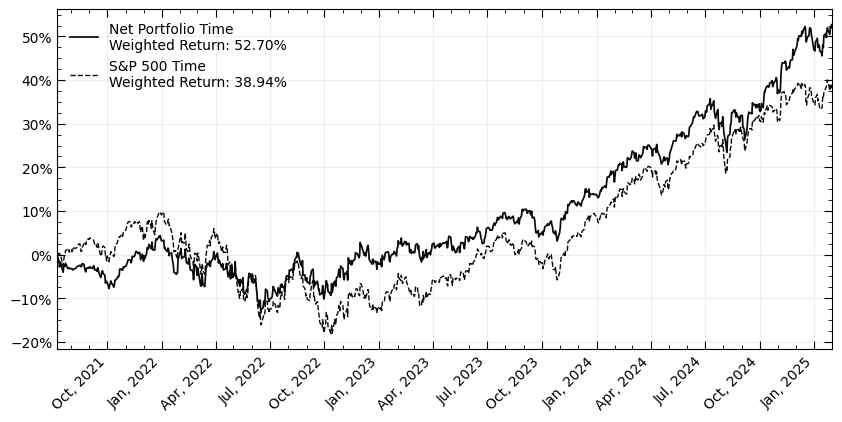

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

# plot total value
ax.plot(example_portfolio.portfolio_data['returns'], color=plot_greys[0], linestyle='-', linewidth=1.25,
        label=f'Net Portfolio Time\nWeighted Return: {example_portfolio.portfolio_data["returns"].iloc[-1]:,.2f}%')

ax.plot(snp500_data['returns'], color=plot_greys[0], linestyle='--', linewidth=1,
        label=f'S&P 500 Time\nWeighted Return: {snp500_data["returns"].iloc[-1]:,.2f}%')


# format plot
myplt.set_axis_ticks(ax)

ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=[1, 4, 7, 10]))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b, %Y'))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
fig.autofmt_xdate()
plt.xticks(rotation = 45)

ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_formatter('{x:1,.0f}%')

plt.xlim([start_date, end_date])

plt.tick_params(axis='both',labelsize=10)

plt.grid(which='major', alpha=0.2)
legend = plt.legend(fontsize=10, loc='upper left', frameon=False)

plt.savefig(os.path.join(output_directory, 'percent-returns.png'), dpi=300, format='png', bbox_inches='tight')
plt.show()

#### Update README

In [ ]:
# md_file    = 'README.md'
# final_date = end_date

# # rewrite whole md file updating the summary lines
# with open(md_file, 'r') as f:
#     text     = f.readlines()
#     new_text = ''

#     i = 0
#     while text[i] != '## Summary\n':
#         new_text += text[i]
#         i += 1
    
#     new_text += '## Summary\n'
#     new_text += 'Last Updated: ' + final_date.strftime('%b %d, %Y') + '\\\n'
#     new_text += 'Total Portfolio Value:  $ {:1,.0f}\\\n'.format(myPortfolio.value_history[-1])
#     new_text += 'Time Weighted Return: {:.2f}%\n'.format(myPortfolio.time_weighted_ror[-1])

#     i += 4
#     while i < len(text):
#         new_text += text[i]
#         i += 1

# with open(md_file, 'w') as f:    
#     f.write(new_text)